In [ ]:
pip install setfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from setfit import SetFitModel, SetFitTrainer
from sentence_transformers import SentenceTransformer
from datasets import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/job_classification.csv')
df

Mounted at /content/drive


,Unnamed: 0,class_id,title,description
0,0,3,Airport Butler - Concierge,Requisition Number Numro de rquisition 16-078...
1,1,3,Los Angeles Airport - LAX - Commercial Aviatio...,"AccuFleet is looking for a ""hands-on"" operatio..."
2,2,3,AIRPORT POLICE OFFICER 3225,"DUTIES $62,118 to $94,732 Salary range applies..."
3,3,3,Airport Operations Manager,[COMPANY] is committed to being globally compe...
4,4,3,LAX Airport Customer Service Pool,[COMPANY] is hiring at LAX for Customer Servic...
...,...,...,...,...
2055,2055,1,HEALTH FACILITIES EVALUATOR II (SUPERVISOR),Equal Opportunity Employer The State of Califo...
2056,2056,1,Food Service Worker,Apply on Citrus Valley Health Partners gc inse...
2057,2057,1,Public Health Nutritionist I - Supervisory,CAREER DESCRIPTION PUBLIC HEALTH NUTRITIONIST ...
2058,2058,1,Intake Specialist - Behavioral [COMPANY]ealth ...,Job Overview Are you Bilingual in Spanish? Do ...


In [ ]:
df = df.drop(columns= 'Unnamed: 0')

In [ ]:
df.rename(columns= {'class_id':'label'}, inplace= True)

In [ ]:
df.dropna()

,label,title,description
0,3,Airport Butler - Concierge,Requisition Number Numro de rquisition 16-078...
1,3,Los Angeles Airport - LAX - Commercial Aviatio...,"AccuFleet is looking for a ""hands-on"" operatio..."
2,3,AIRPORT POLICE OFFICER 3225,"DUTIES $62,118 to $94,732 Salary range applies..."
3,3,Airport Operations Manager,[COMPANY] is committed to being globally compe...
4,3,LAX Airport Customer Service Pool,[COMPANY] is hiring at LAX for Customer Servic...
...,...,...,...
2055,1,HEALTH FACILITIES EVALUATOR II (SUPERVISOR),Equal Opportunity Employer The State of Califo...
2056,1,Food Service Worker,Apply on Citrus Valley Health Partners gc inse...
2057,1,Public Health Nutritionist I - Supervisory,CAREER DESCRIPTION PUBLIC HEALTH NUTRITIONIST ...
2058,1,Intake Specialist - Behavioral [COMPANY]ealth ...,Job Overview Are you Bilingual in Spanish? Do ...


In [ ]:
df['title'].value_counts()

,count
title,
Water Resources Engineer,38
Senior Water Resources Engineer,18
Driving Job Alternatives at the Airport,12
Water Resources Project Manager,10
Entry Level Water Resources Engineer,10
...,...
"Sr. Concierge, Airport Butler",1
DBH Health Systems Analyst I*,1
Activites Aid - PD - Days - Senior Mental Health Dept - 8 HRS,1


In [ ]:
df['label'].value_counts(normalize=True)

,proportion
label,
3,0.242718
2,0.155340
4,0.155340
0,0.155340
5,0.155340
1,0.135922


In [ ]:
df['description'] = df['description'].astype(str)
df['description'].str.split().map(len).describe()

,description
count,2060.000000
mean,483.683981
std,148.898509
min,1.000000
25%,466.000000
50%,544.000000
75%,573.000000
max,669.000000


In [ ]:
df['text'] = df['title'] + '\n' + df['description']

In [ ]:
np.random.seed(42)
train_df, test_df = train_test_split(df, test_size=.2, stratify=df['label'])
len(train_df), len(test_df)

(1648, 412)

In [ ]:
train_df['label'].value_counts(normalize=True)

,proportion
label,
3,0.242718
4,0.155340
0,0.155340
5,0.155340
2,0.155340
1,0.135922


In [ ]:
train_subset, _ = train_test_split(train_df, train_size=200, stratify=train_df['label'])

train_ds = Dataset.from_pandas(train_subset)
test_ds = Dataset.from_pandas(test_df)

In [ ]:
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-MiniLM-L6-v2")

# Create trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=1 # Number of epochs to use for contrastive learning
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
<ipython-input-14-ae948783dcb4>:4: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
trainer.train()

***** Running training *****
  Num unique pairs = 8000
  Batch size = 16
  Num epochs = 1
/usr/local/lib/python3.11/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rotemklain (rotemklain-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
1,0.289200
50,0.175300
100,0.114200
150,0.087200
200,0.094700
250,0.093300
300,0.081500
350,0.076400
400,0.076400
450,0.084500


In [ ]:
trainer.evaluate()

***** Running evaluation *****


{'accuracy': 0.6796116504854369}

Text(77.92222222222227, 0.5, 'True')

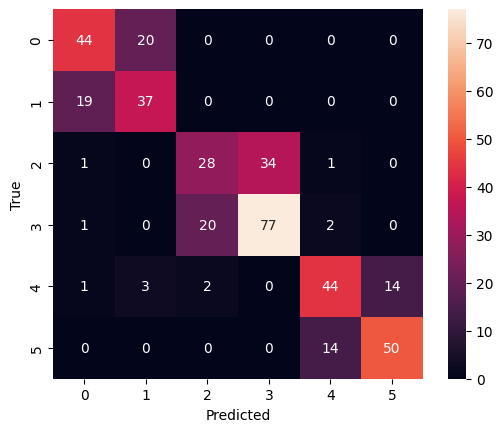

In [ ]:
from sklearn.metrics import confusion_matrix
test_pred = trainer.model.predict(test_df.reset_index()['text'])
sns.heatmap(confusion_matrix(test_df['label'], test_pred), annot=True,square=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
vectorizer = TfidfVectorizer(use_idf=False, stop_words='english')
mega_text = train_df.groupby('label')['text'].apply(lambda texts: '\n'.join(texts))
mega_tf = vectorizer.fit_transform(mega_text)

In [ ]:
import pandas as pd
mega_tf = pd.DataFrame(mega_tf.todense(), columns=vectorizer.get_feature_names_out()).T

pd.DataFrame({
    label: mega_tf[label].sort_values(ascending=False)[:10].index.tolist()
    for label in mega_tf.columns
})

,0,1,2,3,4,5
0,health,health,service,work,water,water
1,care,care,work,airport,work,resources
2,experience,services,airport,service,experience,engineering
3,company,experience,company,required,company,experience
4,patient,department,customer,company,service,design
5,work,medical,experience,experience,required,work
6,medical,position,required,customer,maintenance,project
7,services,patient,time,time,project,projects
8,team,information,customers,duties,management,company
9,nursing,job,job,customers,equipment,management


In [ ]:
train_df.groupby('label')['text'].apply(lambda texts: texts.str.lower().str.contains('water').mean())

,text
label,
0,0.011719
1,0.031250
2,0.093750
3,0.050000
4,0.925781
5,0.992188


In [ ]:
vec_df = TfidfVectorizer(stop_words='english', min_df=5, sublinear_tf=True).fit_transform(train_df['text'])
vec_df = pd.DataFrame(vec_df.todense(), columns=vectorizer.get_feature_names_out())

In [ ]:
vec_df

,00,000,001,00am,00pm,01,02,03,04,06,...,yearly,years,yes,yield,york,youth,zealand,zone,zones,zoning
0,0.0,0.033875,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.030193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.041524,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.021859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.13658,0.0,0.0,0.0,0.145662,...,0.0,0.022887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.066250,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.047272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1645,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.035865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1646,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.021267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi_df = pd.DataFrame(
    {
        label: vec_df.columns[
            np.argsort(
                chi2(vec_df, train_df['label']==label)[1]
                )
            ] for label in range(6)
        }
    ).head(20)

In [ ]:
train_df[(train_df['text'].str.lower().str.contains('airport'))
& (train_df['label']==2)]['text'].sample(1).iloc[0]

"Full-Time Lot Attendant- Cleveland Hopkins Airport\nOverview Equal Opportunity Employer/Disability/Veterans The Cleveland Hopkins Airport is excited to annouce an opening for two Full-Time Lot Attendants! The Lot Attendant will primarily maintain the parking lot at our Cleveland Hopkins facility. The Lot Attendant also performs regular maintenance (non-mechanical services), accepts return vehicles from customers, moves vehicles to designated areas based on service needs, and performs other duties assigned by the manager, all completed in a... safe and timely manner. They will also provide a high level of customer service by assisting customers and assessing their rental needs. The Lot Attendant is also responsible for assisting in the transporting of vehicles to other offices and dealerships throughout the region which requires navigating written directions. The required schedule Sunday through Saturday, nights and weekends, up to 40 hours. Responsibilities The Full Time Lot Attendant

In [ ]:
train_df[(train_df['text'].str.lower().str.contains('airport'))
& (train_df['label']==3)]['text'].sample(1).iloc[0]

"Airport Jobs - Full-Time Line Service Technician at LGB Airport!!!\nFull-Time Line Service Technicians Needed! Training Provided We Service Private Jets [COMPANY], the world's largest FBO network, is hiring Customer-Oriented Line Service Technicians at our LGB Facility in beautiful Long Beach, CA! We are looking for new, self-starting candidates to join our team! Looking for the opportunity to grow in a fast-paced industry? You've come to the right place!! Position: Line Service Technician Status: Full-Time, 40 hours per week Schedule... Varies Benefits: Access to a range of option for Medical, Dental & Vision coverage, 401(k) w/company match, and Tuition Reimbursement Pay: Depending On Experience Line Service Technicians are responsible for servicing our incoming customers and their aircraft by providing basic fueling, towing and lav/water services. As the first face of our facility, our Line Service Techs also provide an extended level of customer service ensuring our customers are 

In [ ]:
keywords = set(sum(chi_df.apply(list,axis=1), []))
len(keywords)

105

In [ ]:
train_df['text'].apply(lambda text: pd.Series({keyword: keyword in text for keyword in keywords}))

,operator,cars,meter,stormwater,dph,hydraulic,healthcare,distribution,mental,trip,...,lift,valves,john,habit,civil,rental,vehicles,fault,grade,clinical
297,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1428,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1599,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1980,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1068,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1396,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
chosen_keywords = train_df['text'].apply(lambda text: pd.Series({keyword: keyword in text for keyword in keywords}))

chosen_keywords = [col for col in chosen_keywords.columns if chosen_keywords[col].sum() >= 50]
len(chosen_keywords)

64

In [ ]:
train_df_keywords = pd.concat([train_df,
                               train_df['text'].apply(lambda text: pd.Series({keyword: keyword in text for keyword in chosen_keywords}))], axis=1)
train_df_keywords.head(1).T

,297
label,3
title,Airport Shuttle Driver
description,No time to complete your application now? No p...
text,Airport Shuttle Driver\nNo time to complete yo...
operator,False
...,...
civil,False
rental,False
vehicles,False
grade,False
